<img style="float: left;" src="pic2.png">

### Sridhar Palle, Ph.D, spalle@emory.edu (Applied ML & DS with Python Program)

# ASSOCIATION RULES MINING

### Installing and importing libraries for doing ARM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Install 'mlxtend library' to work with apriori algorithm. (Note - There are other implementations of ARM also)**

In [2]:
# pip install mlxtend on the command terminal (if not already installed)
# 1) go to anaconda prompt (you can also go here through Anaconda Navigator --> Environments --> base --> Open Terminal)
# 2) pip install mlxtend

**Import apriori algorithm through mlxtend**

In [3]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Step 1. Load the grocery dataset and prepare the dataset

**Load the Groceries DataSet**

In [4]:
grocery = pd.read_csv('GroceriesOriginal.csv')

In [5]:
grocery.head(5)

,itemsetID,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Lets look at the shape**

In [6]:
grocery.shape

(9835, 170)

**Q. How to get the column names ?**

In [7]:
grocery.columns

Index(['itemsetID', 'frankfurter', 'sausage', 'liver loaf', 'ham', 'meat',
       'finished products', 'organic sausage', 'chicken', 'turkey',
       ...
       'candles', 'light bulbs', 'sound storage medium', 'newspapers',
       'photo/film', 'pot plants', 'flower soil/fertilizer', 'flower (seeds)',
       'shopping bags', 'bags'],
      dtype='object', length=170)

**dont need itemsetID, so let's drop it**

In [8]:
grocery = grocery.drop('itemsetID', axis=1)
grocery.shape

(9835, 169)

**convert boolean values to int**

In [9]:
grocery = grocery.astype('int')
grocery.head(3)

,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#lets give new names to rows instead of 0, 1

In [13]:
rnames = ['T' +str(i) for i in range(0,9835)]
grocery.index = rnames
grocery.head(3)

,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
T0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# we have total 9835 transactions, and 169 columns (or food items)

### 1.1. Preliminary exploration and visualization

**The data frame above is a sparse matrix**

In [14]:
# Lets see what items are there in transaction 'T1'
grocery.loc['T1', grocery.loc['T1',:].gt(0)]

tropical fruit    1
yogurt            1
coffee            1
Name: T1, dtype: int32

In [15]:
# Lets see what items are there in transaction 'T2'
grocery.loc['T2', grocery.loc['T2',:].gt(0)]

whole milk    1
Name: T2, dtype: int32

**count of items in each transaction**

In [22]:
grocery.sum(axis=1)

T0        4
T1        3
T2        1
T3        4
T4        4
T5        5
T6        1
T7        5
T8        1
T9        2
T10       5
T11       9
T12       1
T13       3
T14       2
T15       4
T16       1
T17       1
T18       1
T19       1
T20       1
T21       2
T22       1
T23       5
T24      11
T25       2
T26       1
T27       4
T28       1
T29       6
         ..
T9805     5
T9806     3
T9807     1
T9808     4
T9809     6
T9810     4
T9811     6
T9812     7
T9813     4
T9814     4
T9815     1
T9816     3
T9817    12
T9818     1
T9819     9
T9820    10
T9821    12
T9822     2
T9823     3
T9824     4
T9825    10
T9826     6
T9827     9
T9828     7
T9829     7
T9830    17
T9831     1
T9832    10
T9833     4
T9834     5
Length: 9835, dtype: int64

In [24]:
grocery.head(2)

,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
T0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Lets find the most popular items**

In [29]:
grocery.sum(0).sort_values(ascending=False).head(10)

whole milk          2513
other vegetables    1903
rolls/buns          1809
soda                1715
yogurt              1372
bottled water       1087
root vegetables     1072
tropical fruit      1032
shopping bags        969
sausage              924
dtype: int64

In [31]:
popular_items = pd.DataFrame(grocery.sum(0).sort_values(ascending=False)).reset_index()
popular_items.head(3)

,index,0
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809


In [32]:
popular_items.rename(columns = {'index':'item', 0:'count'}, inplace=True)
popular_items.head(3)

,item,count
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809


In [33]:
popular_items['support'] = popular_items['count']/grocery.shape[0]
popular_items = popular_items.head(10)
popular_items.head(3)

,item,count,support
0,whole milk,2513,0.255516
1,other vegetables,1903,0.193493
2,rolls/buns,1809,0.183935


In [34]:
popular_items.head(3) # there are in total 9835 transactions

,item,count,support
0,whole milk,2513,0.255516
1,other vegetables,1903,0.193493
2,rolls/buns,1809,0.183935


**Matplotlib visualization: Lets look at a simple visualization for 10 most popular item**

In [35]:
# We leverage matplotlib.pyplot library for this. We already imported it earlier and aliased with plt

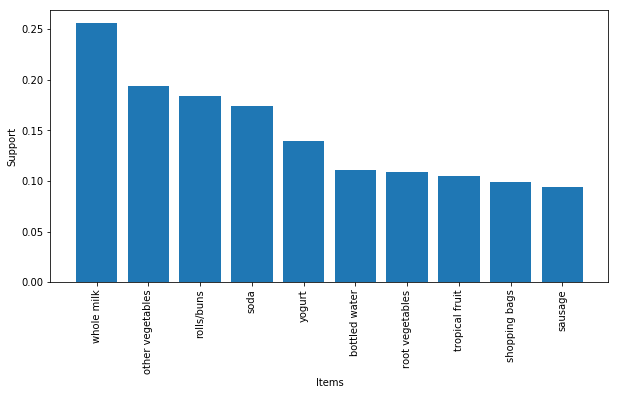

In [36]:
fig = plt.figure(figsize=(10,5))

plt.bar(popular_items['item'], popular_items['support'])
plt.xlabel('Items')
plt.xticks(rotation=90)
plt.ylabel('Support')
plt.show()

**for more information on visualization please see matplotlib official documentation pages**

**https://matplotlib.org/tutorials/index.html**

In [37]:
grocery.shape

(9835, 169)

In [38]:
grocery.head(2)

,frankfurter,sausage,liver loaf,ham,meat,finished products,organic sausage,chicken,turkey,pork,...,candles,light bulbs,sound storage medium,newspapers,photo/film,pot plants,flower soil/fertilizer,flower (seeds),shopping bags,bags
T0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
T1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Step 2. Short-list frequently occuring items/item sets by choosing a support level

**We will leverage the apriori algorithm which we imported to do this**

In [63]:
freq_items = apriori(grocery, min_support=0.01, use_colnames=True, max_len = None)
print (freq_items.shape)

(333, 2)


In [65]:
freq_items.head()

,support,itemsets
0,0.058973,(frankfurter)
1,0.093950,(sausage)
2,0.026029,(ham)
3,0.025826,(meat)
4,0.042908,(chicken)


**Q. How to sort the data frame with most frequently occuring 20 itemsets??**

In [66]:
freq_items.sort_values('support', ascending=False).head(20)

,support,itemsets
18,0.255516,(whole milk)
16,0.193493,(other vegetables)
40,0.183935,(rolls/buns)
60,0.174377,(soda)
23,0.139502,(yogurt)
59,0.110524,(bottled water)
13,0.108998,(root vegetables)
9,0.104931,(tropical fruit)
87,0.098526,(shopping bags)
1,0.093950,(sausage)


## Step 3: From the frequently occuring item sets, generate association rules by choosing a metric

In [67]:
arules = association_rules(freq_items, metric='lift', min_threshold= 2)
arules.shape

(160, 9)

In [68]:
arules.head(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chicken),(root vegetables),0.042908,0.108998,0.010880,0.253555,2.326221,0.006203,1.193659
1,(root vegetables),(chicken),0.108998,0.042908,0.010880,0.099813,2.326221,0.006203,1.063215
2,(other vegetables),(chicken),0.193493,0.042908,0.017895,0.092486,2.155439,0.009593,1.054630


In [71]:
arules.sort_values('confidence', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
50,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059
64,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244
148,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567
118,"(other vegetables, butter)",(whole milk),0.020031,0.255516,0.011490,0.573604,2.244885,0.006371,1.745992
69,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553


### ***Extras (Optional)***

**See rules where at least two items appear in the antecedents**

In [72]:
arules['antlen'] = arules['antecedents'].str.len()
arules.shape

(160, 10)

In [77]:
arules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen
0,(chicken),(root vegetables),0.042908,0.108998,0.010880,0.253555,2.326221,0.006203,1.193659,1
1,(root vegetables),(chicken),0.108998,0.042908,0.010880,0.099813,2.326221,0.006203,1.063215,1
2,(other vegetables),(chicken),0.193493,0.042908,0.017895,0.092486,2.155439,0.009593,1.054630,1
3,(chicken),(other vegetables),0.042908,0.193493,0.017895,0.417062,2.155439,0.009593,1.383521,1
4,(root vegetables),(pork),0.108998,0.057651,0.013625,0.125000,2.168210,0.007341,1.076970,1


In [78]:
arules.loc[arules['antlen'] >= 2, :].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen
44,"(other vegetables, whole milk)",(pork),0.074835,0.057651,0.010168,0.135870,2.356750,0.005853,1.090517,2
45,"(whole milk, pork)",(other vegetables),0.022166,0.193493,0.010168,0.458716,2.370714,0.005879,1.489988,2
48,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354,2
49,"(other vegetables, root vegetables)",(citrus fruit),0.047382,0.082766,0.010371,0.218884,2.644626,0.006450,1.174262,2
50,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,2


**Filter rules with confidence < 0.5 and lift > 3**

In [79]:
arules.loc[(arules['confidence'] > 0.5) & (arules['lift'] > 3), :]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen
50,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,2
64,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,2


In [80]:
arules['antecedents'].head(3)

0             (chicken)
1     (root vegetables)
2    (other vegetables)
Name: antecedents, dtype: object

**Rules where an particular item is present or no in antecedents or consequents**

In [81]:
arules[arules['antecedents'] == {'curd'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen
37,(curd),(yogurt),0.053279,0.139502,0.017285,0.324427,2.325615,0.009853,1.273732,1
39,(curd),(whipped/sour cream),0.053279,0.071683,0.010473,0.196565,2.742150,0.006654,1.155435,1
152,(curd),"(yogurt, whole milk)",0.053279,0.056024,0.010066,0.188931,3.372304,0.007081,1.163866,1


In [82]:
arules[arules['antecedents'] == {'curd', 'yogurt'}]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen
148,"(yogurt, curd)",(whole milk),0.017285,0.255516,0.010066,0.582353,2.279125,0.005649,1.782567,2


In [83]:
arules[arules['consequents'] == {'whole milk'}].head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antlen
69,"(tropical fruit, root vegetables)",(whole milk),0.021047,0.255516,0.011998,0.570048,2.230969,0.006620,1.731553,2
84,"(yogurt, tropical fruit)",(whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,0.007668,1.542528,2
91,"(other vegetables, pip fruit)",(whole milk),0.026131,0.255516,0.013523,0.517510,2.025351,0.006846,1.543003,2
109,"(yogurt, root vegetables)",(whole milk),0.025826,0.255516,0.014540,0.562992,2.203354,0.007941,1.703594,2
115,"(rolls/buns, root vegetables)",(whole milk),0.024301,0.255516,0.012710,0.523013,2.046888,0.006500,1.560804,2
